# Unsupervised Clustering-Kmeans Analysis

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
sns.set(rc={"axes.facecolor":"#FFF8E5", "figure.facecolor":"#FFF8E5"})
palette = ["#003F5C", "#7A5195", "#EF5675", "#38A3A5", "#44355B", "#FF6E54"]
cmap = colors.ListedColormap(palette)
sns.set_palette(palette)


### Reading data from csv

In [9]:
df=pd.read_csv('../input/mushrooms.csv')

### Exploratory Data Analysis:

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### no missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [12]:
df.shape

(8124, 23)

### encoding categorical features to integral values

In [13]:
def encode_dataframe(df):
    categories_per_column = {}
    for column in df.columns:
        df[column] = df[column].apply(lambda val: encode_value(val, column, categories_per_column))
    return df

def encode_value(val, column, categories_per_column):
    if column not in categories_per_column:
        categories_per_column[column] = {}
    if val not in categories_per_column[column]:
        categories_per_column[column][val] = len(categories_per_column[column])
    return categories_per_column[column][val]

df = encode_dataframe(df)


#### Encoder at work

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


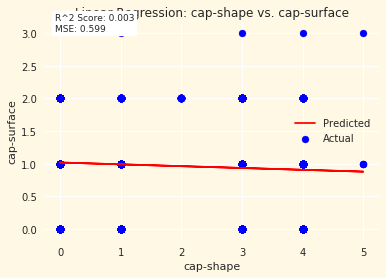

In [44]:

def perform_linear_regression_and_plot(df, independent_var, dependent_var):
    """
    Perform linear regression on two variables from a DataFrame and plot the result.
    
    Parameters:
    - df: The DataFrame containing the data.
    - independent_var: The column name of the independent variable.
    - dependent_var: The column name of the dependent variable.
    """
    # Extracting the data for regression
    x = df[independent_var].values.reshape(-1, 1)
    y = df[dependent_var].values.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    
    # Calculate performance metrics
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    # Plotting the actual data points
    plt.scatter(x, y, color='blue', label='Actual')
    
    # Plotting the predicted line
    plt.plot(x, predictions, color='red', label='Predicted')
    plt.title(f'Linear Regression: {independent_var} vs. {dependent_var}')
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.legend()
    
    # Display the performance metrics
    plt.figtext(0.15, 0.85, f'R^2 Score: {r2:.3f}\nMSE: {mse:.3f}', backgroundcolor='white', fontsize=9)
    
    plt.show()

perform_linear_regression_and_plot(df, 'cap-shape', 'cap-surface')

In [15]:
X=df.drop('class',axis=1)

In [16]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


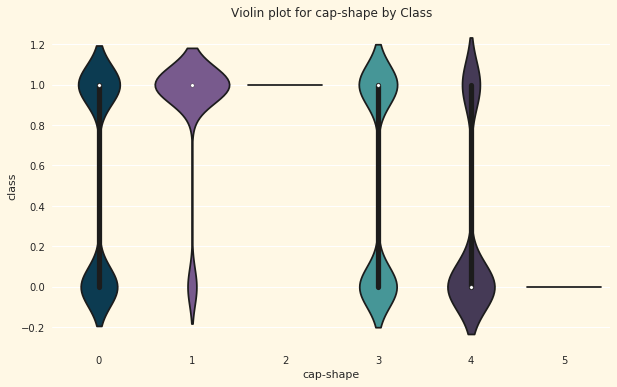

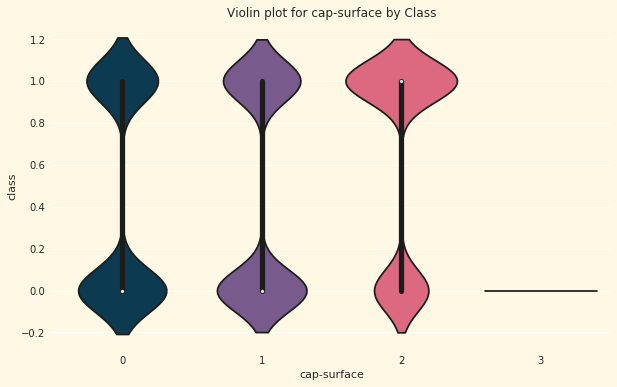

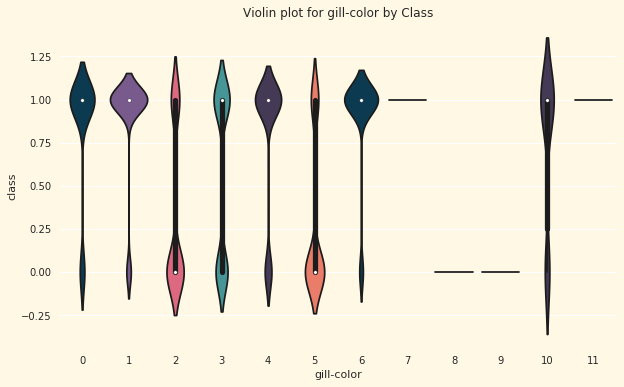

In [41]:
features = ['cap-shape', 'cap-surface', 'gill-color']

# Generating violin plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=feature, y='class', data=df, palette=palette)
    plt.title(f'Violin plot for {feature} by Class')
    plt.show()


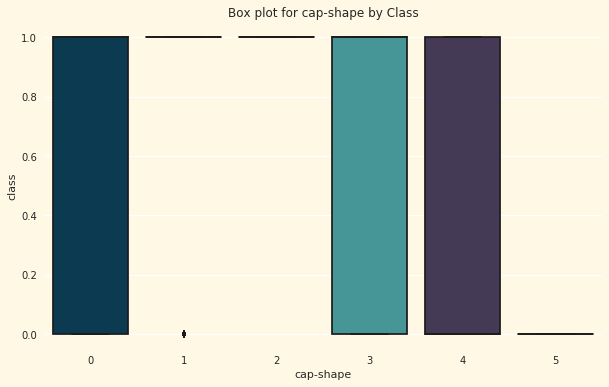

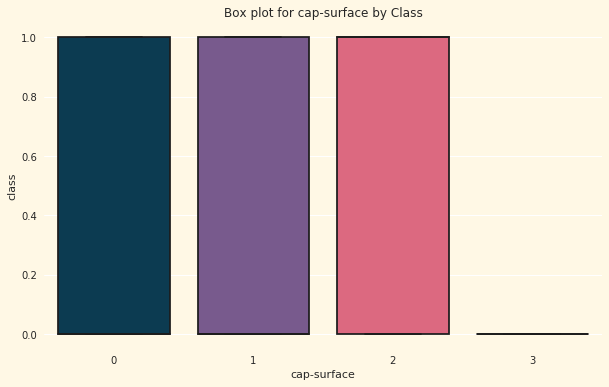

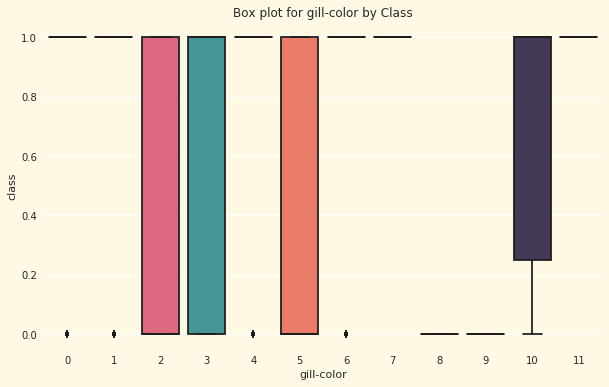

In [42]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='class', data=df, palette=palette)
    plt.title(f'Box plot for {feature} by Class')
    plt.show()


#### 2 principle components for plotting

In [17]:
pca = PCA(n_components=2).fit(X)

In [19]:
ReducedDF = pca.transform(X)


### Exploring Various K Values: Graphing Total Within-Cluster Sum of Squares and Average Silhouette Score for Each K to Determine the Optimal K Value

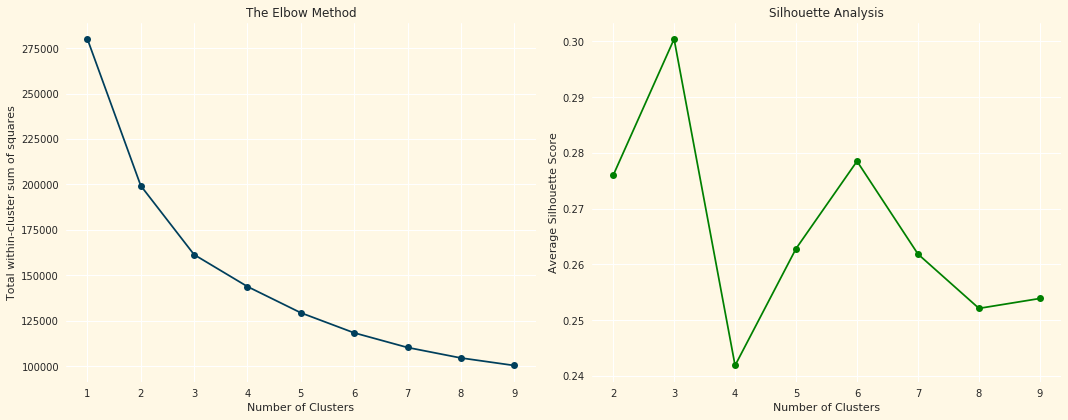

In [26]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method Plot
ax1.plot(range(1, 10), ClusterSum, marker='o')
ax1.set_title('The Elbow Method')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Total within-cluster sum of squares')
ax1.grid(True)

# Silhouette Analysis Plot
ax2.plot(range(2, 10), sa, marker='o', color='green')
ax2.set_title('Silhouette Analysis')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Average Silhouette Score')
ax2.grid(True)

plt.tight_layout()  
plt.show()


Best number of clusters based on silhouette score is 3
Although k=2 does not have the highest average silhouette score, its samples are more uniform, suggesting the appropriate value for k should be 2.


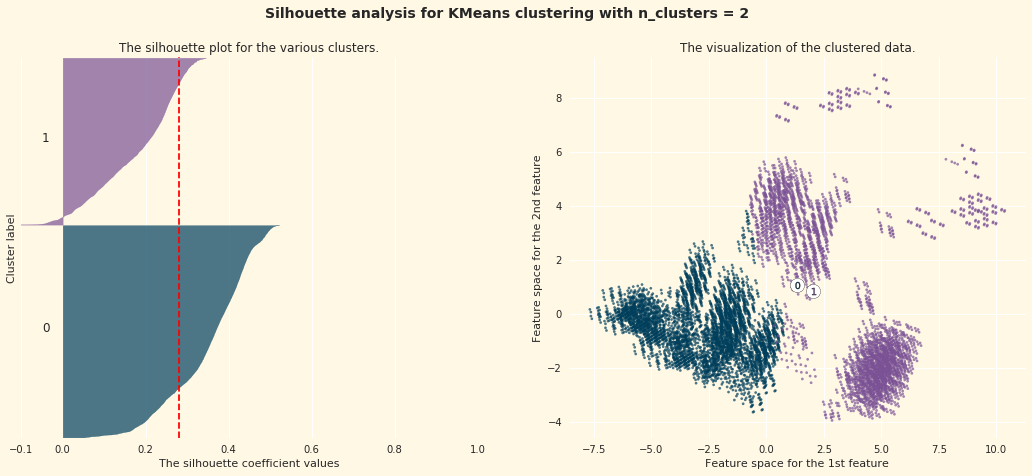

In [32]:

custom_palette = ["#003F5C", "#7A5195", "#EF5675", "#38A3A5", "#44355B", "#FF6E54"]

silhouette_scores = {}
for n_clusters in range(2, 7):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg

best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best number of clusters based on silhouette score is {best_n_clusters}")

print("Although k=2 does not have the highest average silhouette score, its samples are more uniform, suggesting the appropriate value for k should be 2.")
best_n_clusters = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (best_n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=best_n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(best_n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = custom_palette[i % len(custom_palette)]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = [custom_palette[i % len(custom_palette)] for i in cluster_labels]
ax2.scatter(ReducedDF[:, 0], ReducedDF[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = clusterer.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle((f"Silhouette analysis for KMeans clustering with n_clusters = {best_n_clusters}"),
             fontsize=14, fontweight='bold')

plt.show()


# As we can see although k=2 has the second highest avg silhouette score but it's samples are more uniform and thus, the appropriate value for k should indeed be 2 (edible , posionous)

In [33]:
kmeans = KMeans(n_clusters=2, init= 'k-means++')

In [34]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
Ypreds=kmeans.predict(X)

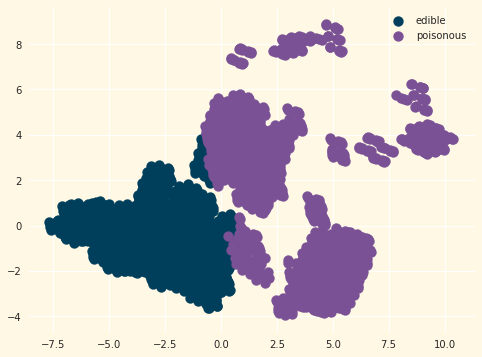

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(ReducedDF[Ypreds == 0, 0], ReducedDF[Ypreds == 0, 1], s = 100, cmap=cmap, label = 'edible')
plt.scatter(ReducedDF[Ypreds == 1, 0], ReducedDF[Ypreds == 1, 1], s = 100 ,cmap=palette , label = 'poisonous')
plt.legend()